<a href="https://colab.research.google.com/github/HalyshAnton/Python-AI/blob/AI_3_lesson/Data_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Посібник з Data Engineering

## Вступ
Data Engineering - це процес підготовки, обробки та перетворення даних для подальшого аналізу та моделювання. У цьому посібнику ми розглянемо ключові концепції Data Engineering, такі як аналіз розподілу дат, використання повзучого вікна та групування даних для отримання агрегованих значень.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [134]:
N = 1000

df = pd.DataFrame({
    'date': np.random.choice(pd.date_range(start='2020-01-01', periods=100, freq='D'), N),
    'user_id': np.random.choice(range(1, 26), N),
    'time_spent': np.random.normal(50, 10, N),
    'device': np.random.choice(['computer', 'mobile', 'unknown'], N),
    'expenses': np.random.normal(10, 2, N)
})

df['expenses'] += (0.5+(df['device']=='mobile'))*df['time_spent']

## Аналіз розподілу дат за допомогою гістограми
Гістограма є одним з основних методів візуалізації розподілу дат у наборі даних. Вона дозволяє побачити, як часто зустрічаються певні часові відрізки.

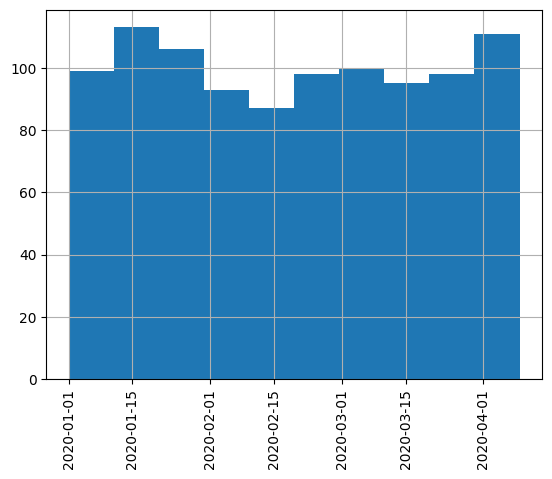

In [135]:
df['date'].hist()
plt.xticks(rotation=90)
plt.show()

## Повзуче вікно (Sliding Window)
Повзуче вікно (Sliding Window) — це метод обробки часових рядів, при якому на кожному кроці аналізується певний відрізок даних, що поступово зміщується вперед.

### Основні аспекти:
- **Розмір вікна** (window size) — кількість точок у кожному вікні.
- **Крок вікна** (step size) — на скільки точок зміщується вікно за один раз.
- **Перекриття** (overlapping) — ступінь перекриття між сусідніми вікнами.

![](https://www.researchgate.net/publication/332031784/figure/fig1/AS:950462694039592@1603619373862/Fixed-window-2-Sliding-Window-Sliding-window-is-made-of-a-fixed-length-and-fixed.png)

In [136]:
df['date'].max() - df['date'].min()

Timedelta('99 days 00:00:00')

In [137]:
min_date = df['date'].min()
min_date

Timestamp('2020-01-01 00:00:00')

In [138]:
window = pd.Timedelta('25D')
gap = pd.Timedelta('10D')

In [139]:
df['norm_date'] = df['date'] - min_date

In [140]:
k = 1
df1 = df[((k-1)*window <= df['norm_date']) & (df['norm_date'] < k*window)]
target_df1 = df[(k*window <= df['norm_date']) & (df['norm_date'] < k*window + gap)]
df1

,date,user_id,time_spent,device,expenses,norm_date
0,2020-01-08,21,48.316662,mobile,83.697526,7 days
2,2020-01-05,1,38.745504,computer,30.961619,4 days
11,2020-01-24,5,57.538077,unknown,40.202881,23 days
12,2020-01-11,16,44.992269,unknown,32.001563,10 days
14,2020-01-09,8,41.638987,computer,27.524746,8 days
...,...,...,...,...,...,...
992,2020-01-22,23,41.412873,unknown,31.300710,21 days
994,2020-01-20,7,56.659365,unknown,39.902199,19 days
996,2020-01-07,13,45.549268,computer,35.091774,6 days
998,2020-01-06,10,51.069423,unknown,35.721632,5 days


## Групування даних по користувачах та агрегація
Групування даних дозволяє об'єднати записи по певним категоріям (наприклад, за користувачем) і розрахувати агреговані значення, такі як середнє, сума, мінімум, максимум та мода.

In [141]:
user_info = df1.groupby(by='user_id').agg({
    'time_spent': ['mean', 'sum', 'min', 'max'],
    'device': lambda x: x.mode()[0]
})

user_info

time_spent                                      device
              mean         sum        min        max  <lambda>
user_id                                                       
1        51.585318  412.682541  34.886119  65.001698  computer
2        54.444834  925.562184  34.087679  76.899796  computer
3        48.769574  926.621904  24.128835  63.527371   unknown
4        48.575139  340.025971  35.715498  72.980913    mobile
5        55.485420  499.368779  43.501311  72.152195   unknown
6        53.270822  266.354109  39.966244  61.282841  computer
7        48.881282  586.575390  30.251414  68.927491    mobile
8        41.394974  579.529636  26.214239  58.851323    mobile
9        53.230798  372.615587  48.905173  62.929587   unknown
10       50.759636  659.875264  29.307857  65.186618    mobile
11       45.484544  682.268158  35.253524  54.011038  computer
12       52.071853  520.718527  42.695456  70.364570  computer
13       49.299379  295.796276  33.982365  59.478309  computer
14       50.829460  457.465138  38.467216  60.680897    mobile
15       46.086212  414.775907  31.243218  56.331431  computer
16       52.869672  634.436067  42.091500  63.997773   unknown
17       48.494292  872.897248  33.119937  67.960531   unknown
18       47.759172  573.110066  18.182619  68.519893   unknown
19       45.821906  274.931438  32.212214  61.852113  computer
20       51.673791  723.433078  35.655281  61.633131   unknown
21       51.724737  413.797894  39.861802  63.256470    mobile
22       54.124475  541.244749  36.163187  72.447273   unknown
23       52.431136  576.742493  35.319585  75.175693  computer
24       51.208235  460.874114  41.582057  62.878150    mobile
25       51.298181  359.087270  40.551737  68.618257   unknown

In [142]:
target_info = target_df1.groupby(by='user_id').agg({
    'expenses': ['sum']
})

In [143]:
user_info.head()

time_spent                                      device
              mean         sum        min        max  <lambda>
user_id                                                       
1        51.585318  412.682541  34.886119  65.001698  computer
2        54.444834  925.562184  34.087679  76.899796  computer
3        48.769574  926.621904  24.128835  63.527371   unknown
4        48.575139  340.025971  35.715498  72.980913    mobile
5        55.485420  499.368779  43.501311  72.152195   unknown

In [144]:
user_info.drop(index=[1, 2, 3], inplace=True)

In [145]:
target_info.drop(index=[20, 21, 22], inplace=True)

In [146]:
user_info.join(target_info, how='inner')

time_spent                                      device    expenses
              mean         sum        min        max  <lambda>         sum
user_id                                                                   
4        48.575139  340.025971  35.715498  72.980913    mobile  217.715176
5        55.485420  499.368779  43.501311  72.152195   unknown  123.665963
6        53.270822  266.354109  39.966244  61.282841  computer  231.353479
7        48.881282  586.575390  30.251414  68.927491    mobile  257.710267
8        41.394974  579.529636  26.214239  58.851323    mobile  107.219777
9        53.230798  372.615587  48.905173  62.929587   unknown  235.555868
10       50.759636  659.875264  29.307857  65.186618    mobile  101.665167
11       45.484544  682.268158  35.253524  54.011038  computer  181.489637
12       52.071853  520.718527  42.695456  70.364570  computer  200.099654
13       49.299379  295.796276  33.982365  59.478309  computer  117.007553
14       50.829460  457.465138  38.467216  60.680897    mobile  411.441452
15       46.086212  414.775907  31.243218  56.331431  computer  183.368994
16       52.869672  634.436067  42.091500  63.997773   unknown   68.062563
17       48.494292  872.897248  33.119937  67.960531   unknown  265.883509
18       47.759172  573.110066  18.182619  68.519893   unknown  145.345398
19       45.821906  274.931438  32.212214  61.852113  computer  204.897778
23       52.431136  576.742493  35.319585  75.175693  computer  339.276650
24       51.208235  460.874114  41.582057  62.878150    mobile   93.930987
25       51.298181  359.087270  40.551737  68.618257   unknown   66.091450

In [187]:
def select_info(k):
    df1 = df[((k-1)*window <= df['norm_date']) & (df['norm_date'] < k*window)]
    target_df1 = df[(k*window <= df['norm_date']) & (df['norm_date'] < k*window + gap)]

    user_info = df1.groupby(by='user_id').agg({
        'time_spent': ['mean', 'sum', 'min', 'max'],
        'device': lambda x: x.mode()[0],
        'expenses': ['sum']
    })

    target_info = target_df1.groupby(by='user_id').agg({
        'expenses': ['sum']
    })

    target_info.columns = pd.MultiIndex.from_tuples([('target', '')])

    return user_info.join(target_info, how='inner')

In [188]:
data = pd.DataFrame()
for k in range(1, 5):
    info = select_info(k)

    data = pd.concat([data, info])

data.reset_index(inplace=True)
data.drop(columns='user_id', inplace=True)
data.head()

<ipython-input-188-b335b55454e3>:8: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data.drop(columns='user_id', inplace=True)


time_spent                                      device    expenses  \
        mean         sum        min        max  <lambda>         sum   
0  51.585318  412.682541  34.886119  65.001698  computer  438.699268   
1  54.444834  925.562184  34.087679  76.899796  computer  896.446400   
2  48.769574  926.621904  24.128835  63.527371   unknown  788.333810   
3  48.575139  340.025971  35.715498  72.980913    mobile  393.796164   
4  55.485420  499.368779  43.501311  72.152195   unknown  514.000800   

       target  
               
0  174.076522  
1  411.789486  
2  274.583702  
3  217.715176  
4  123.665963

In [189]:
data.columns = data.columns.to_flat_index().str.join("_")

In [190]:
data.head()

,time_spent_mean,time_spent_sum,time_spent_min,time_spent_max,device_<lambda>,expenses_sum,target_
0,51.585318,412.682541,34.886119,65.001698,computer,438.699268,174.076522
1,54.444834,925.562184,34.087679,76.899796,computer,896.446400,411.789486
2,48.769574,926.621904,24.128835,63.527371,unknown,788.333810,274.583702
3,48.575139,340.025971,35.715498,72.980913,mobile,393.796164,217.715176
4,55.485420,499.368779,43.501311,72.152195,unknown,514.000800,123.665963


## Побудова моделі

In [191]:
y = data['target_']
X = data.drop(columns='target_')

In [192]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)

In [193]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

In [194]:
num_columns = X.select_dtypes(include="number").columns
cat_columns = X.select_dtypes(include="object").columns

# числові ознаки
num_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median"))]
    )

# категоріальні ознаки
cat_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")),
           ("encoder", OrdinalEncoder())
           ])

# об'єднання двох pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_columns),
        ("cat", cat_transformer, cat_columns),
    ]
)

preprocessor.set_output(transform='pandas')
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['time_spent_mean', 'time_spent_sum', 'time_spent_min', 'time_spent_max',
       'expenses_sum'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder())]),
                                 Index(['device_<lambda>'], dtype='object'))])

In [195]:
preprocessor.fit(X_train)

X_train_prep = preprocessor.transform(X_train)
X_test_prep = preprocessor.transform(X_test)

X_train_prep.head(5)

,num__time_spent_mean,num__time_spent_sum,num__time_spent_min,num__time_spent_max,num__expenses_sum,cat__device_<lambda>
22,52.431136,576.742493,35.319585,75.175693,597.454508,0.0
5,53.270822,266.354109,39.966244,61.282841,277.094737,0.0
33,55.734820,668.817837,46.022424,70.797953,686.265334,2.0
56,49.825351,597.904207,36.140541,64.787962,628.225058,2.0
66,53.776715,860.427443,42.383519,64.092018,745.823331,2.0


In [196]:

import lightgbm as lgbm

model = lgbm.LGBMRegressor(objective='mse')

In [197]:
model.fit(X_train_prep, y_train,
          eval_set=[(X_train_prep, y_train),
                    (X_test_prep, y_test)],
          eval_names=['train', 'test'],
          eval_metric=['mae'])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000027 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 60, number of used features: 5
[LightGBM] [Info] Start training from score 218.761558
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

LGBMRegressor(objective='mse')

In [198]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

In [199]:
all_metrics = pd.DataFrame()

y_pred = model.predict(X_train_prep)
all_metrics['train with mse'] = get_metrics(y_train, y_pred)

y_pred = model.predict(X_test_prep)
all_metrics['test with mse'] = get_metrics(y_test, y_pred)

all_metrics

,train with mse,test with mse
MAE,75.70,76.73
RMSE,96.58,93.68
R2,0.29,-2.02


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

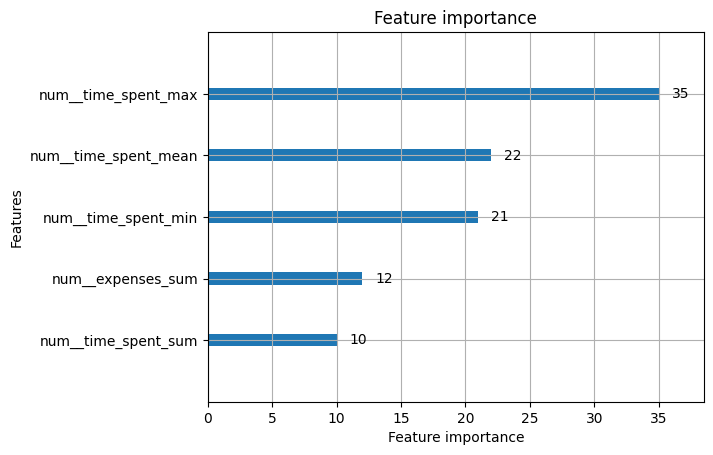

In [200]:
lgbm.plot_importance(model)

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='l1'>

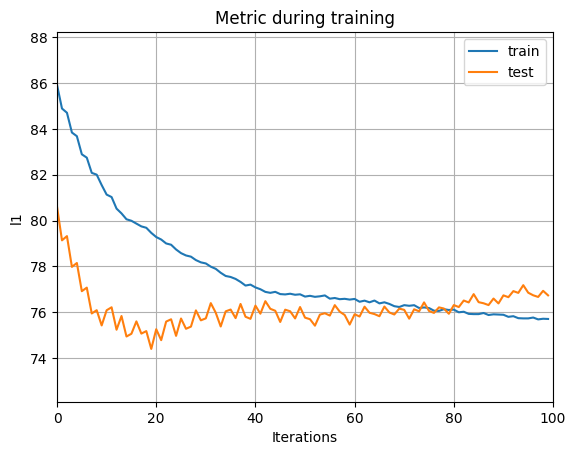

In [201]:
lgbm.plot_metric(model,
                 metric='l1')